In [1]:
#Clasificacion de imagenes incorporadas con Keras.

from keras.datasets import mnist #base de datos de digitos escritos a mano.
#Cargar la imagenes en variables de train y test.
#x_train y x_test son los conjuntos de datos con las imagenes de entrenamiento y validacion respectivamente.
#y_train y y_test son los dataset con las etiquetas.

(x_train, y_train), (x_test, y_test) = mnist.load_data() 

### Dataset de ejemplo

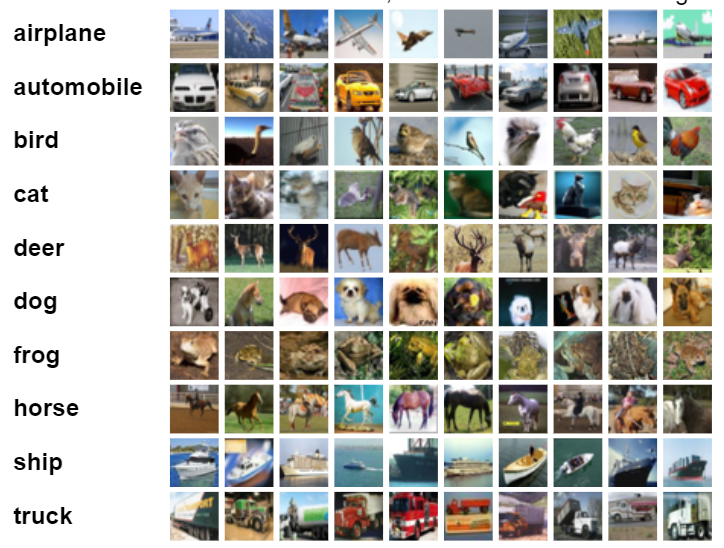

In [2]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#600000 imagenes del tamano 28x28 pixeles

x_train.shape

(60000, 28, 28)

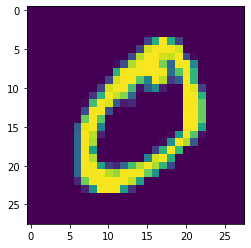

In [5]:
plt.imshow(x_train[1])

In [6]:
#Imagen de la posicion 0
single_image = x_train[0]

In [7]:
#Image del tamano 28x28 pixeles.
single_image.shape

(28, 28)

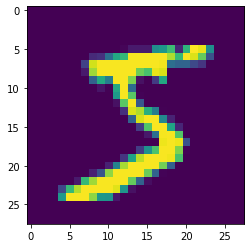

In [8]:
#Mostrar la imagen
plt.imshow(single_image)

In [9]:
#Y contine un array con la representacion numerica de la imagen.
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [60]:
#representacion numeric para la imagen de la posicion 0.
y_test[0]

7

## Procesamiento para el etiquetado de datos

### Categoriacion o Dummificacion de Y

In [11]:
#Consiste en transformar las etiquetas 'Y' en un vector de tantos ceros como el número de etiquetas distinta
#, y que contiene el valor de 1 en el índice que le corresponde al valor de la etiqueta.
#El etiquetado esta realacioado a la categorizacion de numeros
#etiquetaado
#dumificacion (onehotencoder)

from keras.utils.np_utils import to_categorical #Categorizacion. Envez de OneHotEncoder.

In [12]:
#60000 imagenes, sin categoria
y_train.shape

(60000,)

In [13]:
#Se obtendran 10 categorias.
y_example = to_categorical(y_train)

In [14]:
#60000 imagenes, 10 categorias
y_example.shape

(60000, 10)

In [53]:
#Pertence a la categoria de la posicion 5.
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [66]:
#CATEGORIZACION O DUMMIFICACION

#Categorizacion para el testeo
y_cat_test = to_categorical(y_test,10) #10 categorias

In [17]:
#Categorizacion para el entrenamiento
y_cat_train = to_categorical(y_train,10)

In [63]:
#Representacion numerica de la imagen de la posicion 0, es el numero 5.
y_train[0]

5

In [64]:
#Representacion categorica de la imagen de la posicion 0, es un vector con el 1 activado.
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Procesamiento para la normalizacion de datos

### Normalizacion de las imagenes

In [18]:
#Para la normaalizacino siempre hay que dividir entre en numero maximo de pixeles.
#El valor maximo es 255, a color o blanco y negro.
#La normalizacion es importante para que no exista sesgo.
#Una red neuronal siempre tiene que ser normalizado.

#Valor maximo de la imagene
single_image.max()

255

In [19]:
#Valor minimo de la imagen
single_image.min()

0

In [67]:
#NORMALIZACION

#Valores entre 0 y 1 flotante.
#Para equilibrar el pixeleado en imagenes se tiene que normalizar.
x_train = x_train/255
x_test = x_test/255

In [21]:
#Imagen escalada
scaled_single = x_train[0]

In [22]:
#Valor maximo de la imagen escalada
scaled_single.max()

1.0

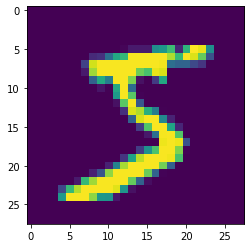

In [23]:
#Imagen a escala, normalizado y etiquetada
plt.imshow(scaled_single)

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
x_test.shape

(10000, 28, 28)

In [68]:
#ASIGNACION DE UN CANAL DE COLOR

#Incluir a las imagenes de x_train un canal

#Permite realizar asignaciones de canal.
#Reshape=Permite asignar normas y formas.
#Es mejor trabajar a escala de grises.
x_train = x_train.reshape(60000,28,28,1)

In [27]:
#6000 imagenes con un solo canal
x_train.shape

(60000, 28, 28, 1)

In [28]:
#Incluir a las imagenes de y_train un canal 

x_test = x_test.reshape(10000,28,28,1)

In [29]:
#10000 imagenes con un solo canal.
x_test.shape

(10000, 28, 28, 1)

In [30]:
#Error: Invalid shape (28, 28, 1) for image data
#plt.imshow(x_test[1])

## Entrenamiento

In [31]:
from keras.models import Sequential #Inicalizcion del a red neuronal
from keras.layers import Conv2D #Capa de convolucion
from keras.layers import MaxPool2D #Matrices pooleadas
from keras.layers import Flatten #Aplanar los datos
from keras.layers import Dense #Capa de la red neuronal

In [32]:
#Inicializar la red neuronal y crera la capa de convolucion

#filters=32, mapas de caracteristicas.
#kernel_size=(4,4), tamano del kernel de la matriz de rasgos..
#input_shape=(28,28,1),#tamno de la imagenes y cantidad de canales para el entrenamiento.
#activation="relu", funcion de activacion
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))

In [33]:
#Capa de maxpooling

#pool_size=(2,2), tamano de la ventana o matriz del pooling. Dato generico.
model.add(MaxPool2D(pool_size=(2,2)))

In [34]:
#Flattening

#Aplanamiento sera de 28x28
model.add(Flatten())

In [35]:
#Primera capa oculta

#128, cantidad de nueronas de la capa oculta.
#activation="relu", funcion de activacion.
model.add(Dense(128, activation="relu"))

In [36]:
#Capa de salida

#10, cantidad de nueronas de salida. 0,1,2,3,4,5,6,7,8,9,10
#activation="softmax", es similar a la funcion de activacion softmax.
model.add(Dense(10, activation="softmax"))

In [37]:
#Compilacion

#La compilacion es un traductor que transforma un programa de un lenguaje de programacion o otro. 
    #Usualmente el lenguaje objetivo es codigo maquina.
#loss="categorical_crossentropy", control de perdida para 10 categorias
    #Existen diferentes funciones para el control de perdida de informacion: categorical, binary, etc.
    #Si fuera binary, solo trabajaria con las dos primeras categorias.
#optimizer="rmsprop", siempre se ha utilizado 'adam'
    #rmsprop, es otro algoritmo de optimizador.
#metrics=["accuracy"], exactitucd
        
model.compile(loss="categorical_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

In [38]:
#Resumen de la configuracion de la RNC

model.summary()
'''
Layer (type)                 Output Shape(salida)      Param #(Parametros)   
=================================================================
Capa de convolucion          25x25 matrices, con 32 mapas de caracteristicas       544 imagenes verificadores de control de rasgos.
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
Capa de maxpooling           12x12 matrices (mas pequeno), con 32 mapas de caracteristicas
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
Aplanamiento                 4608 cantidad de informacion de se va a sacar con el aplanamiento   
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
Capa oculta de la RNA        128 neuronas              589952 cantidad de conexiones de las 128 neuronas
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
Capa salida RNA              10 neuronas              1290 cantidad de conexiones de las 10 neuronas
dense_2 (Dense)              (None, 10)                1290      
=================================================================
'''

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


'\nLayer (type)                 Output Shape(salida)      Param #(Parametros)   \n=================================================================\nCapa de convolucion          25x25 matrices, con 32 mapas de caracteristicas       544 imagenes verificadores de control de rasgos.\nconv2d_1 (Conv2D)            (None, 25, 25, 32)        544       \n_________________________________________________________________\nCapa de maxpooling           12x12 matrices (mas pequeno), con 32 mapas de caracteristicas\nmax_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         \n_________________________________________________________________\nAplanamiento                 4608 cantidad de informacion de se va a sacar con el aplanamiento   \nflatten_1 (Flatten)          (None, 4608)              0         \n_________________________________________________________________\nCapa oculta de la RNA        128 neuronas              589952 cantidad de conexiones de las 128 neuronas\ndense_1 (Dense)    

In [39]:
#Entrenamiento

#epocs=50, cantidad de epocas.
    #Depende del acc.
    #Si el 'acc' es mayor del 90% entonces disminuri la cantidad de epocas
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1325 - accuracy: 0.9600
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0477 - accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0349 - accuracy: 0.98960s - loss: 0.0350 - accuracy: 0.98
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0272 - accuracy: 0.9921
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0209 - accuracy: 0.9941
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0168 - accuracy: 0.9955
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0137 - accuracy: 0.9965
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0115 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0087 - accuracy: 0.9975
Epoch 10/10
1875/1875 [=======

### Evaluacion del modelo

In [40]:
#99,81% de efectiviad del modelo
model.metrics_names

['loss', 'accuracy']

In [41]:
#Evaluacion del modelo
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0648 - accuracy: 0.9875


[0.06484882533550262, 0.987500011920929]

In [42]:
#Reportes de clasificacion
from sklearn.metrics import classification_report

In [43]:
#Prediccion a nivel de clases
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [44]:
y_cat_test.shape

(10000, 10)

In [45]:
#En la posicion 0 esta el numero 7.
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [46]:
#En la posicion 0, efectivamente esta el numero 7
predictions[0]

7

In [47]:
#La prediccion y los datos y_test coinciden
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [48]:
#Reporte de presicion
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.97      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

